#Principal component Analisis


In [14]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report, roc_curve, roc_auc_score
import seaborn as sns

from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

from collections import Counter

In [15]:
df = pd.read_csv('polen.csv')
features = df.loc[:,df.columns!='clase'].columns.values
df = df.drop(df.columns[(df == 0).all()],axis=1)


In [16]:
df.fillna(0, inplace=True)
pca = PCA()
components = pca.fit_transform(df[features])

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(5)}
labels['color'] = 'clase'

fig = px.scatter_matrix(
    components,
    color=df["clase"],
    dimensions=range(5),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()




/Users/harlock/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [17]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)



Linear Component Analysis

In [18]:
#Preprocess Data

dataset = df
# Divide the data set into features (X) and target variable (y)
X = dataset.iloc[:, 0:-2].values
y = dataset.iloc[:, -1].values

y_description=y
# Encode the target variable
#le = LabelEncoder()
#y = le.fit_transform(y)


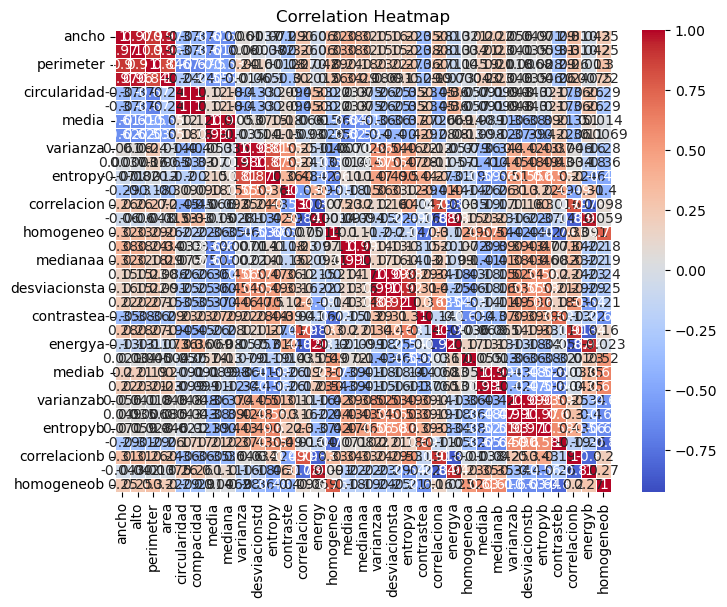

In [19]:
correlation_matrix = dataset.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [20]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)



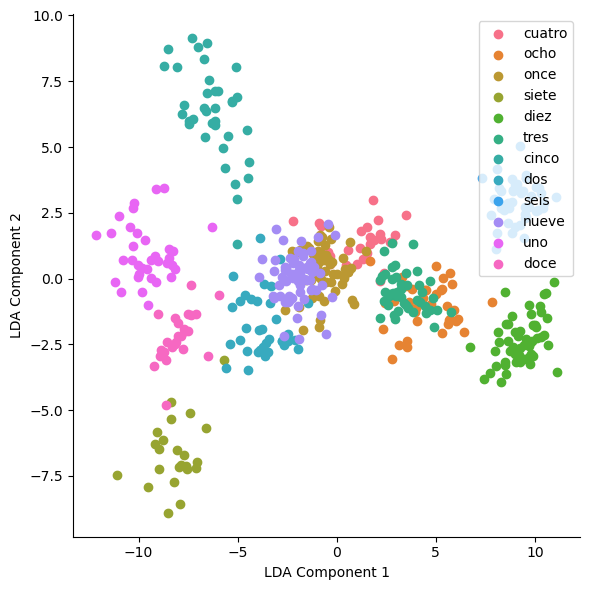

In [25]:
tmp_Df = pd.DataFrame(X_train[:,0:2], columns=['LDA Component 1','LDA Component 2'])
tmp_Df['Class']=y_train

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'LDA Component 1',
                              'LDA Component 2')

plt.legend(loc='upper right')



Indipendent Component Analysis 

In [26]:
data_numeric = df.select_dtypes(include=['number'])

In [27]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
ica = FastICA(n_components=4, random_state=42, whiten='unit-variance')
ica.fit(data_scaled)
independent_components = ica.transform(data_scaled)

print("Primeras componentes independientes:")
print(independent_components[:, :4])

Primeras componentes independientes:
[[-0.99772548 -0.11785635  0.01162441 -1.6612887 ]
 [-0.73573934 -0.08837373  0.08237101 -2.11838643]
 [-0.79597711  0.08914491  0.68776641 -1.28804187]
 ...
 [ 0.69581725 -0.16210338  0.93597894 -0.94219577]
 [ 0.62346098 -0.07327461  1.53575535 -0.53964524]
 [ 0.74525886 -0.17195946  1.55482941 -0.85295419]]


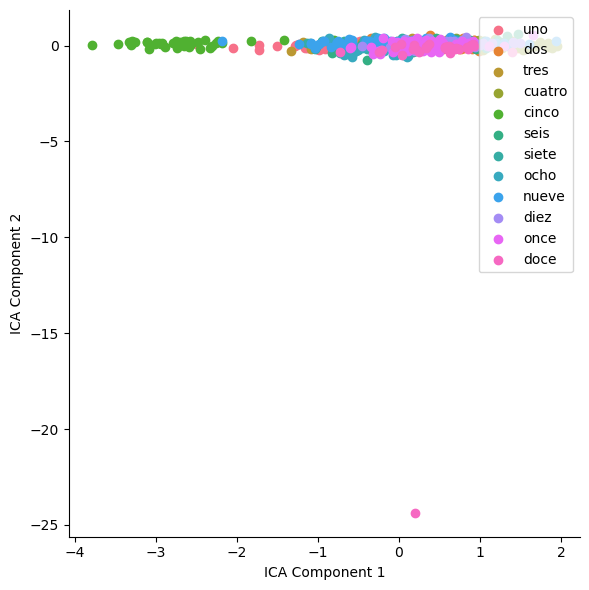

In [31]:
tmp_Df = pd.DataFrame(independent_components[:,0:2], columns=['ICA Component 1','ICA Component 2'])
tmp_Df['Class']=y

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'ICA Component 1',
                              'ICA Component 2')

plt.legend(loc='upper right')

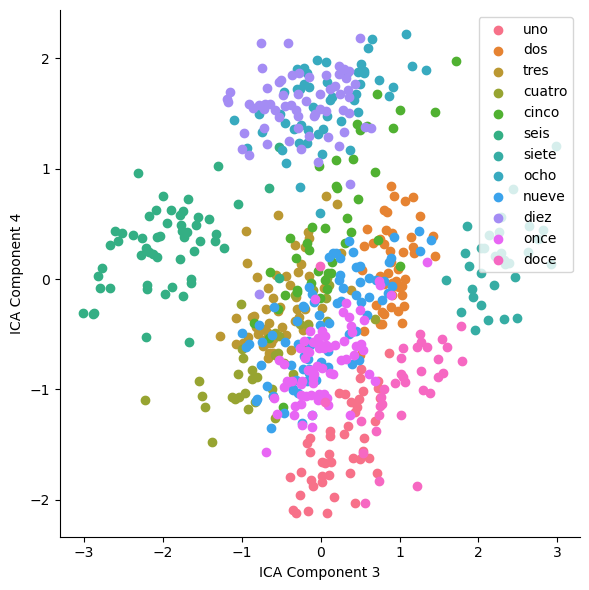

In [30]:
tmp_Df = pd.DataFrame(independent_components[:,2:4], columns=['ICA Component 3','ICA Component 4'])
tmp_Df['Class']=y

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'ICA Component 3',
                              'ICA Component 4')

plt.legend(loc='upper right')

#### test RandomForest LCA

In [32]:
classifier = RandomForestClassifier(max_depth=5, random_state=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)




Accuracy: 0.95
              precision    recall  f1-score   support

       cinco       1.00      1.00      1.00         6
      cuatro       0.89      0.89      0.89         9
        diez       1.00      0.91      0.95        11
        doce       0.89      1.00      0.94         8
         dos       1.00      0.82      0.90        11
       nueve       0.85      0.92      0.88        12
        ocho       1.00      1.00      1.00        14
        once       1.00      0.90      0.95        10
        seis       1.00      1.00      1.00        11
       siete       1.00      1.00      1.00         9
        tres       0.86      1.00      0.92        12
         uno       1.00      1.00      1.00        11

    accuracy                           0.95       124
   macro avg       0.96      0.95      0.95       124
weighted avg       0.96      0.95      0.95       124



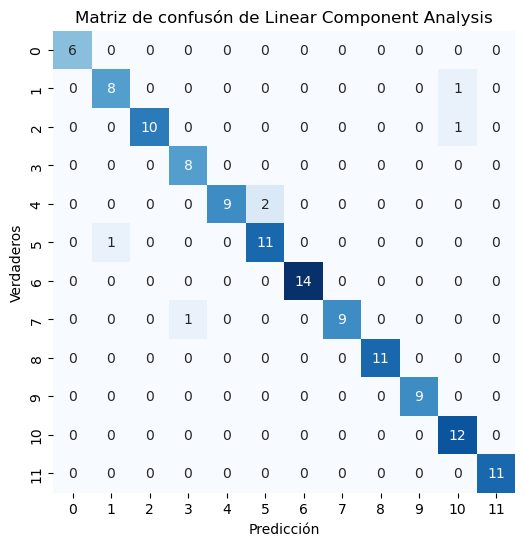

In [50]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)



#Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("Matriz de confusón de Linear Component Analysis")
plt.show()

#### test RandomForest PCA

In [34]:
#Preprocess Data
tmp_Df_pca = pd.DataFrame(components[:,0:4], columns= {str(i): f"PC {i+1}" for i in range(4)})
tmp_Df_pca['Class']=y_description



# Divide the data set into features (X) and target variable (y)
X_pca = tmp_Df_pca.iloc[:, 0:4].values
y_pca = tmp_Df_pca.iloc[:, 4].values

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2)



In [35]:
classifier_pca = RandomForestClassifier(max_depth=6, random_state=5)
classifier_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = classifier_pca.predict(X_test_pca)



Accuracy: 0.78
              precision    recall  f1-score   support

       cinco       1.00      1.00      1.00         8
      cuatro       0.50      0.33      0.40         3
        diez       0.79      0.79      0.79        14
        doce       0.75      0.86      0.80         7
         dos       0.89      0.89      0.89         9
       nueve       0.92      0.85      0.88        13
        ocho       0.45      0.69      0.55        13
        once       0.85      0.73      0.79        15
        seis       0.77      0.83      0.80        12
       siete       1.00      0.62      0.77         8
        tres       0.73      0.62      0.67        13
         uno       1.00      1.00      1.00         9

    accuracy                           0.78       124
   macro avg       0.80      0.77      0.78       124
weighted avg       0.81      0.78      0.79       124



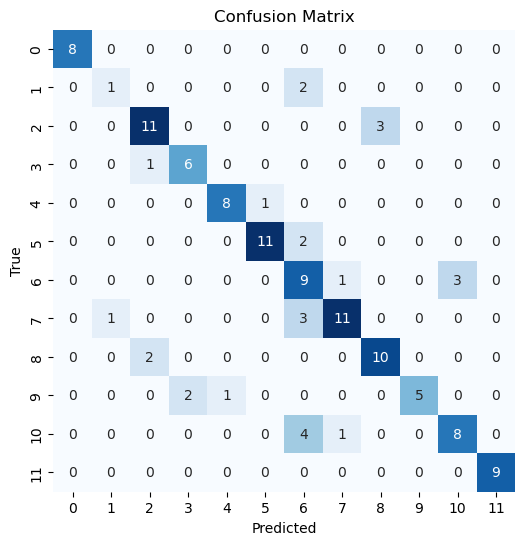

In [36]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
conf_m_pca = confusion_matrix(y_test_pca, y_pred_pca)

#Display the accuracy
print(f'Accuracy: {accuracy_pca:.2f}')

print(classification_report(y_test_pca, y_pred_pca))


#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m_pca, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### test RandomForest ICA


In [37]:
#Preprocess Data
tmp_Df_ica = pd.DataFrame(independent_components[:, :4], columns= {str(i): f"PC {i+1}" for i in range(4)})
tmp_Df_ica['Class']=y_description


# Divide the data set into features (X) and target variable (y)
X_ica = tmp_Df_ica.iloc[:, 0:4].values
y_ica = tmp_Df_ica.iloc[:, 4].values

X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(X_ica, y_ica, test_size=0.2)


In [38]:
classifier_ica = RandomForestClassifier(max_depth=6, random_state=5)
classifier_ica.fit(X_train_ica, y_train_ica)
y_pred_ica = classifier_ica.predict(X_test_ica)


Accuracy: 0.78
              precision    recall  f1-score   support

       cinco       1.00      0.86      0.92         7
      cuatro       1.00      0.44      0.62         9
        diez       1.00      0.88      0.93        16
        doce       1.00      0.83      0.91        12
         dos       0.81      1.00      0.90        13
       nueve       0.79      0.50      0.61        22
        ocho       0.71      0.83      0.77         6
        once       0.47      0.75      0.58        12
        seis       1.00      0.89      0.94         9
       siete       0.60      1.00      0.75         3
        tres       0.53      0.89      0.67         9
         uno       1.00      1.00      1.00         6

    accuracy                           0.78       124
   macro avg       0.83      0.82      0.80       124
weighted avg       0.83      0.78      0.78       124



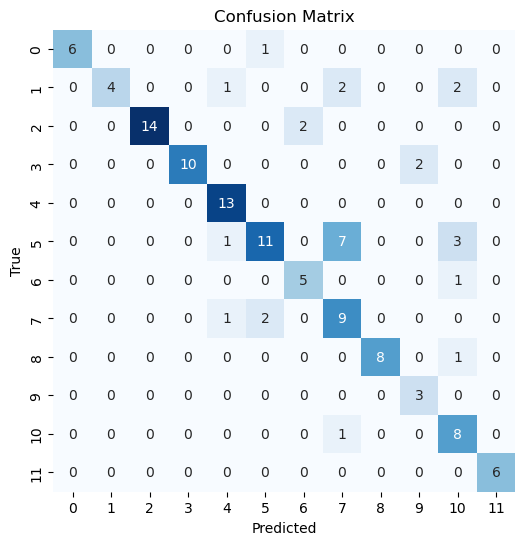

In [39]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy_ica = accuracy_score(y_test_ica, y_pred_ica)
conf_m_ica = confusion_matrix(y_test_ica, y_pred_ica)

#Display the accuracy
print(f'Accuracy: {accuracy_ica:.2f}')
print(classification_report(y_test_ica, y_pred_ica))

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m_ica, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### RANDOM FOREST ORIGINAL DATA

In [40]:
#Preprocess Data
dataset = df
# Divide the data set into features (X) and target variable (y)



# Divide the data set into features (X) and target variable (y)
X_ori = dataset.iloc[:, 0:-2].values
y_ori = dataset.iloc[:, -1].values

X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X_ori, y_ori, test_size=0.2)

In [41]:
classifier_ori = RandomForestClassifier(max_depth=6, random_state=5)
classifier_ori.fit(X_train_ori, y_train_ori)
y_pred_ori = classifier_ori.predict(X_test_ori)


Accuracy: 0.98
              precision    recall  f1-score   support

       cinco       1.00      1.00      1.00        10
      cuatro       1.00      0.86      0.92         7
        diez       1.00      1.00      1.00        12
        doce       1.00      1.00      1.00         7
         dos       0.92      1.00      0.96        11
       nueve       1.00      0.94      0.97        17
        ocho       1.00      1.00      1.00        13
        once       1.00      1.00      1.00        11
        seis       1.00      1.00      1.00        13
       siete       1.00      1.00      1.00         5
        tres       0.92      1.00      0.96        11
         uno       1.00      1.00      1.00         7

    accuracy                           0.98       124
   macro avg       0.99      0.98      0.98       124
weighted avg       0.99      0.98      0.98       124



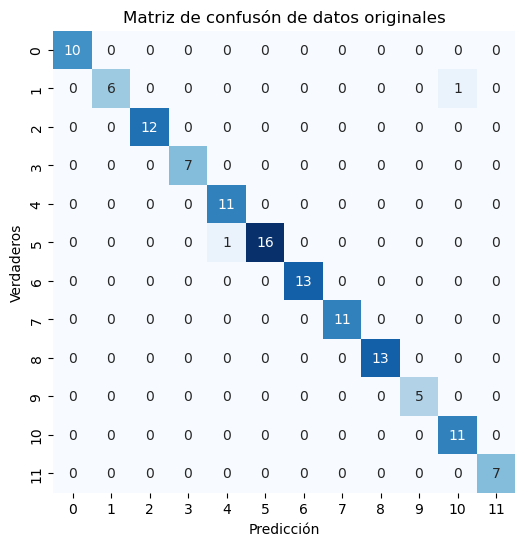

In [51]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy_ori = accuracy_score(y_test_ori, y_pred_ori)
conf_m_ori = confusion_matrix(y_test_ori, y_pred_ori)

#Display the accuracy
print(f'Accuracy: {accuracy_ori:.2f}')

print(classification_report(y_test_ori, y_pred_ori))

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m_ori, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("Matriz de confusón de datos originales")
plt.show()

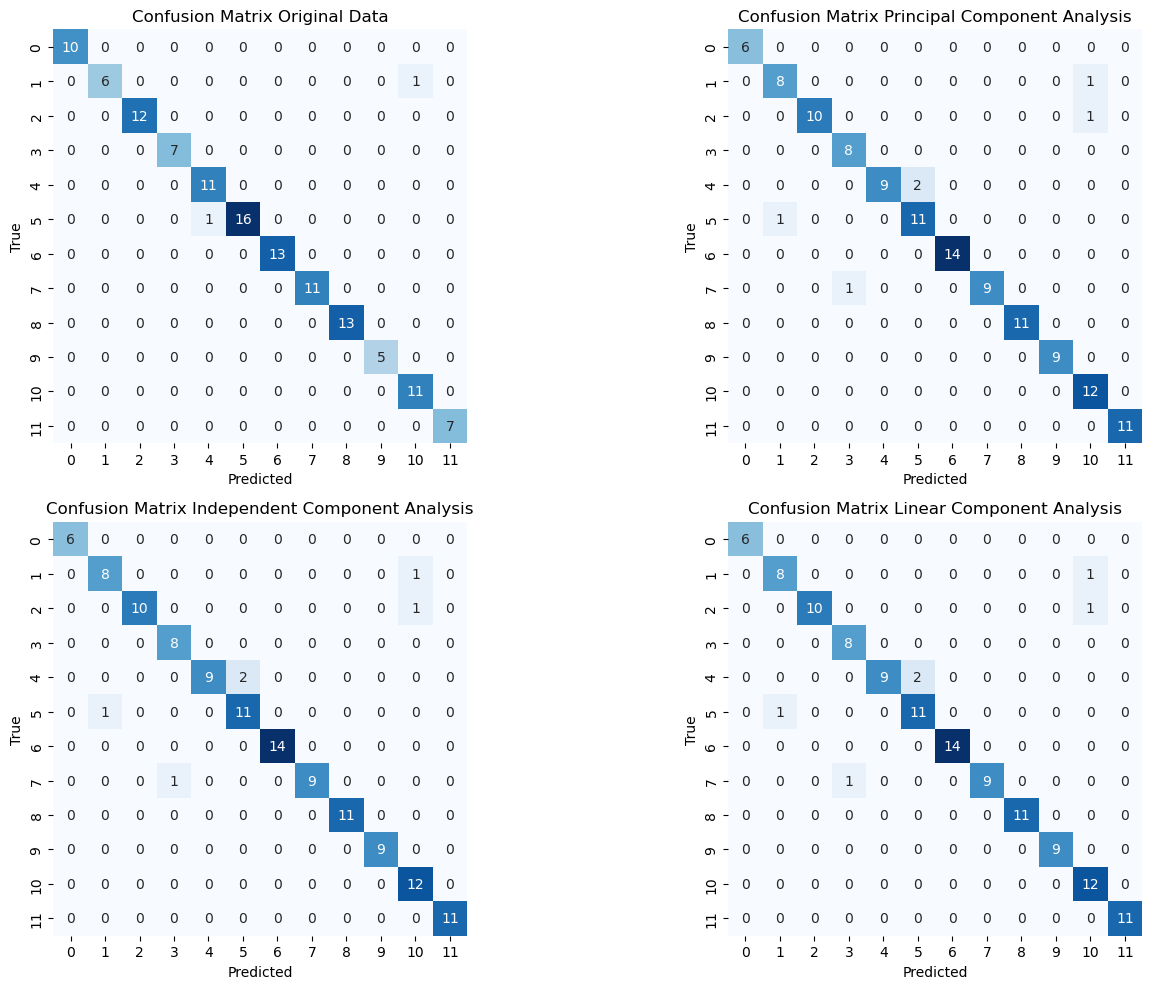

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))


ax=axes[0,0]
sns.heatmap(conf_m_ori, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix Original Data")

ax=axes[0,1]
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix Principal Component Analysis")

ax=axes[1,0]
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix Independent Component Analysis")

ax=axes[1,1]
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix Linear Component Analysis")

plt.tight_layout()
plt.show()